<a href="https://colab.research.google.com/github/Carnage203/ML/blob/main/Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dt=pd.read_csv('Credit Card Customer Data.csv')

In [ ]:
dt.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [ ]:
dt.isnull()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
655,False,False,False,False,False,False,False
656,False,False,False,False,False,False,False
657,False,False,False,False,False,False,False
658,False,False,False,False,False,False,False


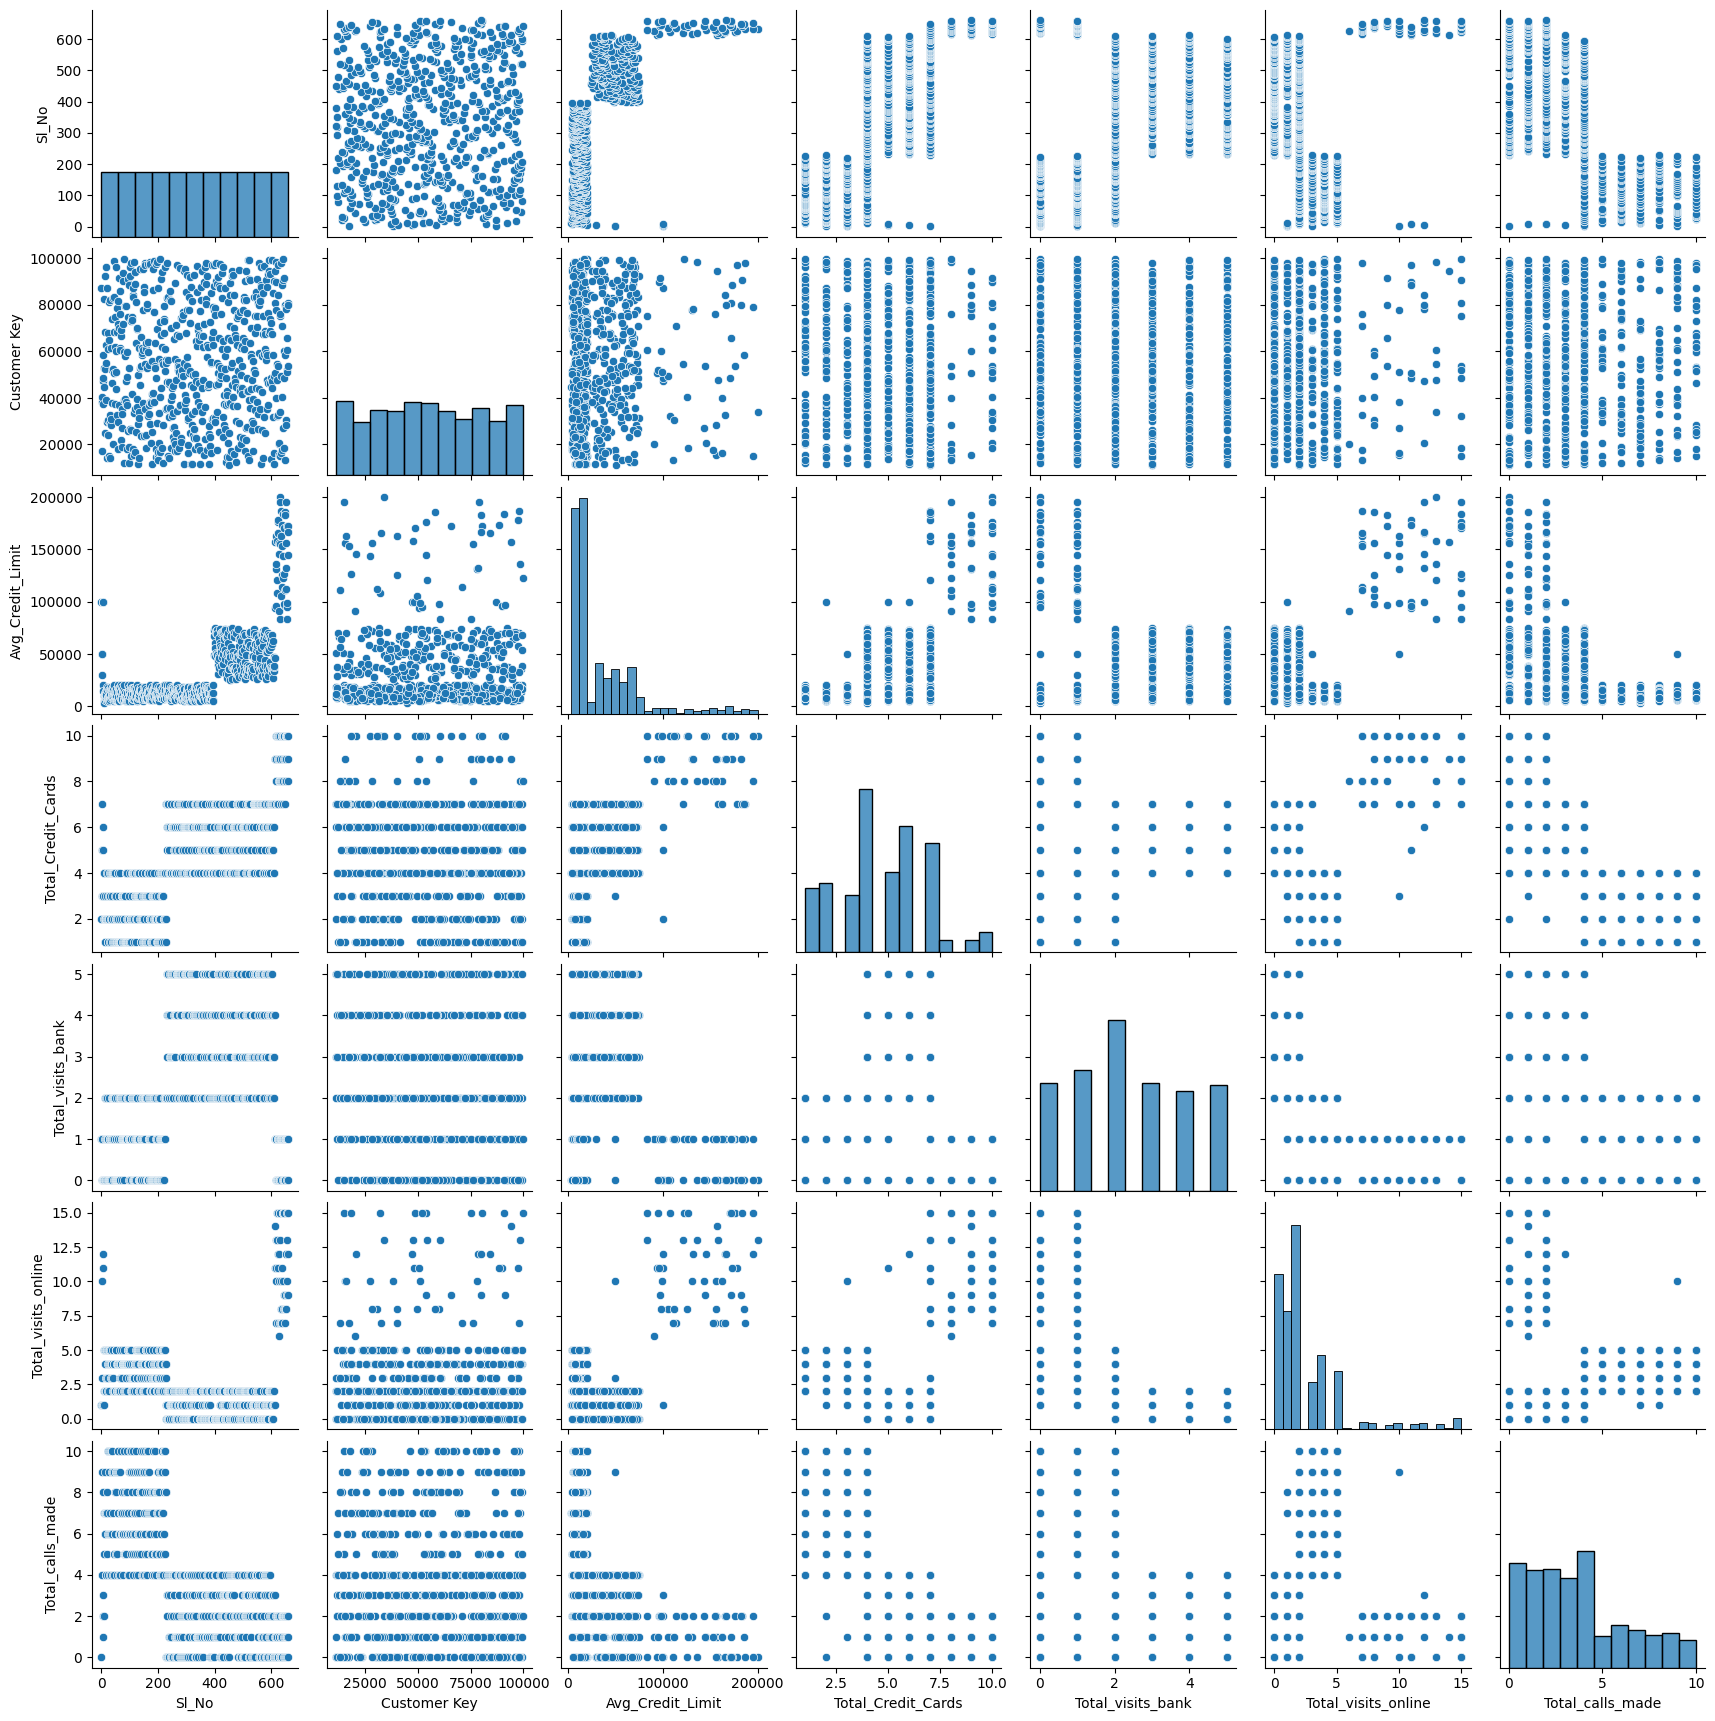

In [ ]:
sns.pairplot(dt)

In [ ]:
dt['Total_Credit_Cards'].value_counts()

Total_Credit_Cards
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: count, dtype: int64

In [ ]:
dt['Total_visits_online'].value_counts()

Total_visits_online
2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
10      6
12      6
8       6
11      5
13      5
9       4
14      1
6       1
Name: count, dtype: int64

In [ ]:
dt['Total_visits_bank'].value_counts()

Total_visits_bank
2    158
1    112
0    100
3    100
5     98
4     92
Name: count, dtype: int64

In [ ]:
dt['Total_calls_made'].value_counts()

Total_calls_made
4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: count, dtype: int64

In [ ]:
corr_matrix=dt.corr()
print(corr_matrix)

                        Sl_No  Customer Key  Avg_Credit_Limit  \
Sl_No                1.000000      0.052886          0.677962   
Customer Key         0.052886      1.000000          0.068604   
Avg_Credit_Limit     0.677962      0.068604          1.000000   
Total_Credit_Cards   0.739329     -0.010281          0.608860   
Total_visits_bank    0.406438     -0.000560         -0.100312   
Total_visits_online  0.033916      0.022506          0.551385   
Total_calls_made    -0.684125      0.005968         -0.414352   

                     Total_Credit_Cards  Total_visits_bank  \
Sl_No                          0.739329           0.406438   
Customer Key                  -0.010281          -0.000560   
Avg_Credit_Limit               0.608860          -0.100312   
Total_Credit_Cards             1.000000           0.315796   
Total_visits_bank              0.315796           1.000000   
Total_visits_online            0.167758          -0.551861   
Total_calls_made              -0.651251      

<Axes: >

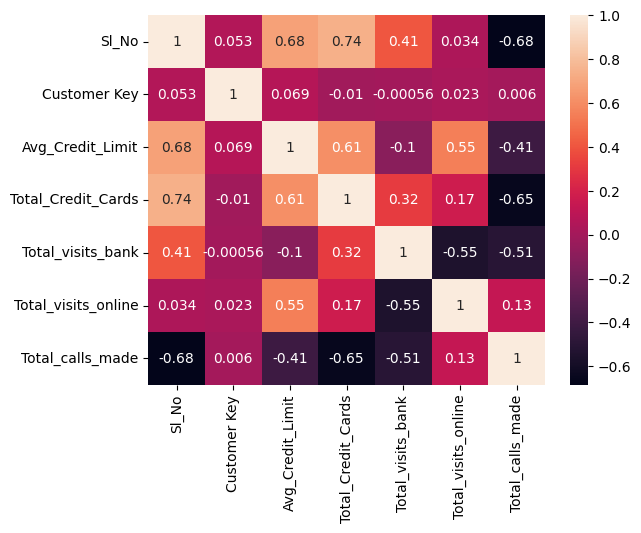

In [ ]:
sns.heatmap(corr_matrix,annot=True)

In [ ]:
dt=dt.drop(columns=['Sl_No','Total_Credit_Cards'],axis=1)

<Axes: >

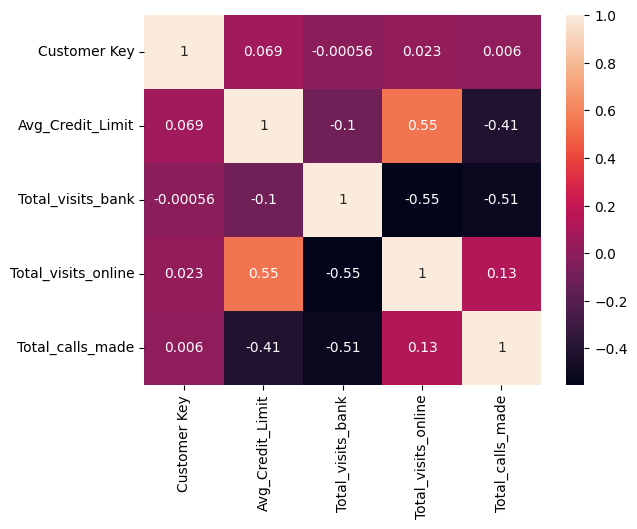

In [ ]:
corr_matrix=dt.corr()
sns.heatmap(corr_matrix,annot=True)

In [ ]:
dt.head(10)

,Customer Key,Avg_Credit_Limit,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,1,1,0
1,38414,50000,0,10,9
2,17341,50000,1,3,4
3,40496,30000,1,1,4
4,47437,100000,0,12,3
5,58634,20000,0,1,8
6,48370,100000,0,11,2
7,37376,15000,0,1,1
8,82490,5000,0,2,2
9,44770,3000,0,1,7


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sse=[]
k_range=range(1,5)
print(k_range)
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(dt[['Avg_Credit_Limit','Total_visits_online']])
  sse.append(km.inertia_)

range(1, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


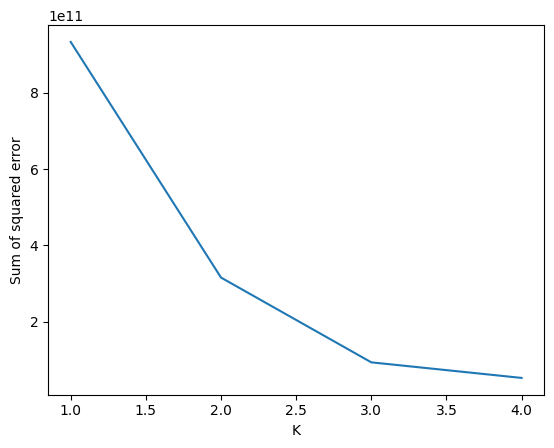

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [ ]:
km=KMeans(n_clusters=3)
y_hat=km.fit_predict(dt[['Avg_Credit_Limit','Total_visits_online']])
y_hat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dt['Cluster']=y_hat
dt.head()

,Customer Key,Avg_Credit_Limit,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,87073,100000,1,1,0,2
1,38414,50000,0,10,9,2
2,17341,50000,1,3,4,2
3,40496,30000,1,1,4,0
4,47437,100000,0,12,3,2


In [ ]:
km.cluster_centers_

array([[1.38491879e+04, 2.31554524e+00],
       [1.54205128e+05, 1.08717949e+01],
       [5.70315789e+04, 1.56842105e+00]])

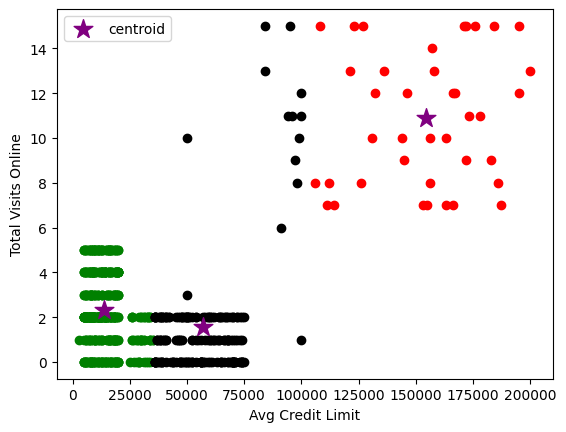

In [ ]:
dt1 = dt[dt.Cluster==0]
dt2 = dt[dt.Cluster==1]
dt3 = dt[dt.Cluster==2]
plt.scatter(dt1['Avg_Credit_Limit'], dt1['Total_visits_online'], color='green')
plt.scatter(dt2['Avg_Credit_Limit'], dt2['Total_visits_online'], color='red')
plt.scatter(dt3['Avg_Credit_Limit'], dt3['Total_visits_online'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=200, label='centroid')
plt.xlabel('Avg Credit Limit')
plt.ylabel('Total Visits Online')
plt.legend()

In [ ]:
dt['Cluster'].value_counts()

Cluster
0    431
2    190
1     39
Name: count, dtype: int64

In [ ]:
for i in range(0,max(dt.Cluster)+1):
  new_df=dt[dt['Cluster']==i]
  print(new_df)
  filename='new'+str(i)+'.csv'
  new_df.to_csv(filename)

     Customer Key  Avg_Credit_Limit  Total_visits_bank  Total_visits_online  \
3           40496             30000                  1                    1   
5           58634             20000                  0                    1   
7           37376             15000                  0                    1   
8           82490              5000                  0                    2   
9           44770              3000                  0                    1   
..            ...               ...                ...                  ...   
586         76398             31000                  3                    0   
589         46373             29000                  5                    0   
601         47198             33000                  4                    0   
604         58276             27000                  3                    0   
607         90191             34000                  3                    1   

     Total_calls_made  Cluster  
3                 